<a href="https://colab.research.google.com/github/villafue/LinkedIn_Python_Stastics_Essential_Training/blob/master/04_02_confidenceintervals_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io
import os

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
os.chdir('sample_data')

In [6]:
poll = pd.read_csv('poll.csv')

In [7]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [8]:
poll.head()


,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [9]:
'''
The data is just one column with votes for 2 different candidates. Value_counts
tell us the value of the votes and normalize=True means the range goes from 0-1.
It also turns it into a fraction/porportion of the total vote. 
'''
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [ ]:
'''
Now the question is how representative is this data for the overall population.
I.e. does this voting sample of 1000 votes mean that Mayor Brown will stay in
office?
To answer the question, we're going to run simulations on our data and see 
what if continued running of the data would lead to the same result.
'''

In [12]:
'''
Trying out random function in numpy. I tried seeding to ensure my results are
the same.
'''
np.random.seed(42)
np.random.rand(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [16]:
'''
This shows boolean values that satisfy the requirement of numbers less than .51.
'''
np.random.seed(42)
np.random.rand(5) < 0.51

array([ True, False, False, False,  True])

In [17]:
'''
We add the numpy function where as it will convert the True/False values to str.
we list. In our example, 0.51 will be True (Brown) as it satisfies the requirement.
False will = Green
'''
np.random.seed(42)
np.where(np.random.rand(5) < 0.51, 'Brown','Green')

array(['Brown', 'Green', 'Green', 'Green', 'Brown'], dtype='<U5')

In [18]:
'''
Now we're going to take the above and wrap it inside a function
'''
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [24]:
'''
Testing the assumption that Brown holds less than 51% of the votes, we set-up
parameters to pass into our function.
'''
s = sample(0.51,n=1000)
s.head()

,vote
0,Brown
1,Green
2,Green
3,Green
4,Brown


In [21]:
'''
Variable "s" was a returned dataframe from the sample function. That is why it has
the "vote" column. As way above, we check the values of this sample.
'''
s.vote.value_counts(normalize=True)

Green    0.506
Brown    0.494
Name: vote, dtype: float64

In [22]:
'''
Now we're going to run this simulation 1000 more times to have a better idea of
our data. Unfortunately, I don't yet know how to fully describe this code.
'''
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [23]:
dist.head()

,Brown,Green
vote,0.507,0.493
vote,0.525,0.475
vote,0.514,0.486
vote,0.518,0.482
vote,0.531,0.469


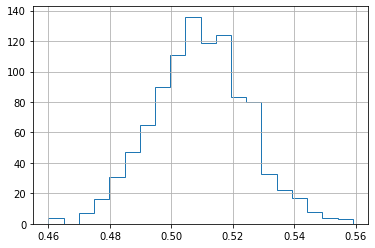

In [25]:
'''
Now we plot the above and get a better idea of Brown/Green?
Brown votes seem to go from .48 to .54.
'''
dist.Brown.hist(histtype='step',bins=20)

In [ ]:
'''
The plot above sucks. We just learned about confidence intervals as our data falls
into a likely range of values rather than one set value. The typical confidence interval
is 95% which means a value of 100 has a confidence interval (range) of 95 - 105.

Although there are many ways to find this, resampling is probably the easiest 
and fastest.

'''

In [26]:
'''
I brought the following code to compare it to the sampledist function:

def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

It looks like samplingdist is the combined code of both above.
'''

def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [27]:
'''
This function takes in the above function and says what the range is for a
specific value. These are the edges of the confidence interval.
'''
def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [28]:
'''
I'm putting many different values to see what value will get us 0.51 on each end:
both the 0.025 and .975 ends. This is for the 95% confidence interval.
'''

quantiles(0.50)

(0.47, 0.530025)

In [29]:
'''
Bingo on the 97.5% quantile (right side is .51ish)
'''

quantiles(0.48)

(0.447975, 0.511)

In [30]:
'''
Bingo on the 2.5% quantile (left side is .51ish)
'''
quantiles(0.54)

(0.5099750000000001, 0.572)

In [ ]:
'''
In conclusion, our finding says this:

For an observed sample proportion of .51, when the sample size is 1000, the 95%
confidence interval for the True population function is 0.48 to 0.54.

In other words:

95% confidence interval: [0.48, 0.54]
Estimate = 0.51 +- 0.03(at 95% confidence)
.51 is point estimate
margin of error is .03

Thus:

The result of this election lies within the margin of error of the poll.

'''

In [31]:
'''
As a journalist, this is too close for comfort. I can't publish this with confidence
stupid pun.
So, I incease the sample to 10,000.
'''
dist = samplingdist(0.50,10000)

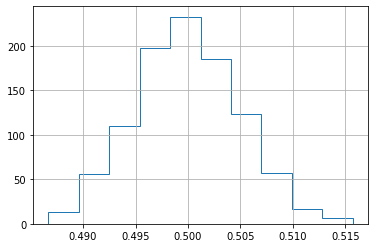

In [32]:
'''
He's saying the margin of error is more like 1%, but I cannot tell by this graph.
Also, why is it .50 instead of .51 for brown?

Update:

After rewatching the video, it looks like Brown goes from .49 to .51 which is 
better?
'''
dist.Brown.hist(histtype='step')

In [ ]:
'''
This is just "proof" of what we did by resampling to 10,000.
'''
largepoll = pd.read_csv('poll-larger.csv')

In [ ]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [ ]:
'''
The winner is actually Mrs. Green, and if we computed for her proportion, it would
be .508 and .528.
It doesn't include the threshold of .50.
'''